# Исследуйте, как различные факторы влияют на красоту человека (красота измеряется по шкале от 1 до 5).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузите файл Beauty.csv.

Столбец looks - это красота человека.

In [4]:
#your code here
df = pd.read_csv("beauty.csv")
df.head(1)

,wage,exper,union,service,educ,looks,sex,race,status,health
0,5.73,30,no,no,14,4,female,white,married,good


## Проведите однофакторный анализ

А именно, исследуйте влияние каждого фактора в отдельности на красоту человека.

Исследование проводите по аналогии с исследованием в ноутбуке Seminar1.ipynb.

In [3]:
#your code here
df.describe()

,wage,exper,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,12.563492,3.185714
std,4.660639,11.963485,2.624489,0.684877
min,1.020000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,12.000000,3.000000
50%,5.300000,15.000000,12.000000,3.000000
75%,7.695000,27.000000,13.000000,4.000000
max,77.720000,48.000000,17.000000,5.000000


In [4]:
#df.isnull().sum()
df['union'].unique()
#df['service'].unique()

array(['no'], dtype=object)

C:\Users\IbnSina\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


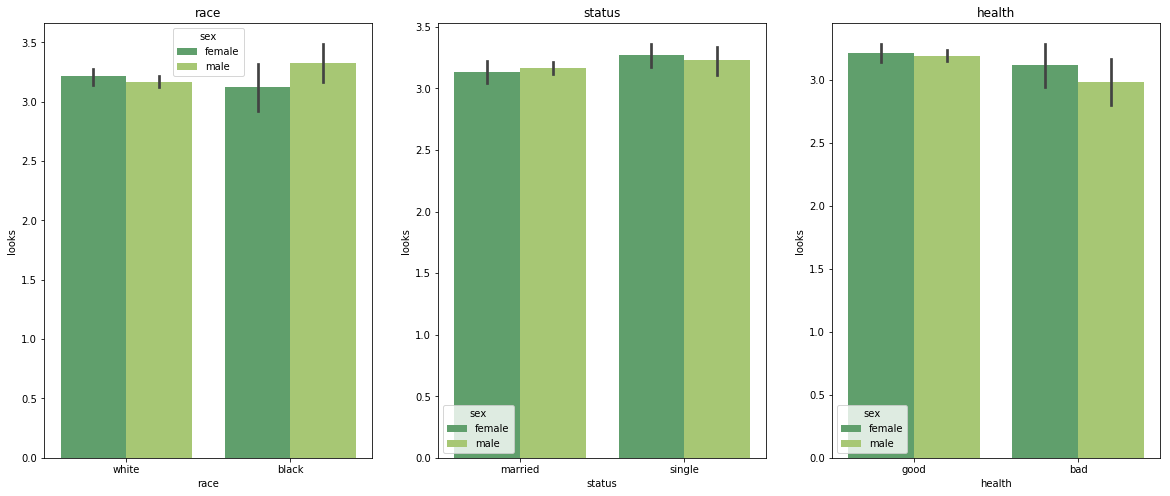

In [5]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='race',y='looks',data=df,hue='sex',\
           palette='summer')
plt.title('race')
plt.subplot(1, 3, 2)
sns.barplot(x='status',y='looks',data=df,hue='sex',\
           palette='summer')
plt.title('status')
plt.subplot(1, 3, 3)
sns.barplot(x='health',y='looks',data=df,hue='sex',\
           palette='summer')
plt.title('health')
plt.show()

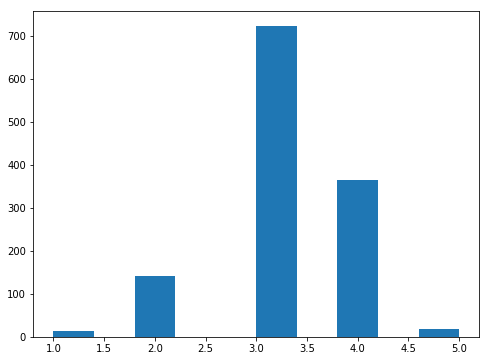

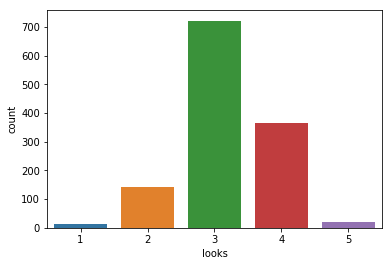

In [6]:
plt.figure(figsize=(8,6))
plt.hist(df['looks'])
plt.show()
sns.countplot(x='looks',data=df)
plt.show()

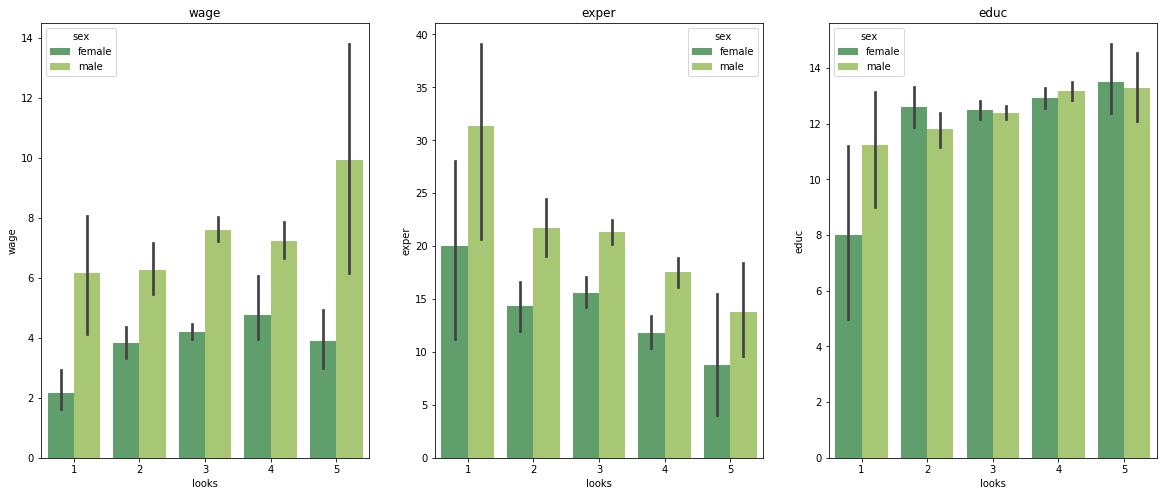

In [7]:
#wage	exper	educ	looks
#sex	race	status	health
#plt.scatter(df['educ'], df['looks'], alpha=0.5)
#plt.show()
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='looks',y='wage',data=df, hue='sex', \
           palette='summer')
plt.title('wage')
plt.subplot(1, 3, 2)
sns.barplot(x='looks',y='exper',data=df,hue='sex',\
           palette='summer')
plt.title('exper')
plt.subplot(1, 3, 3)
sns.barplot(x='looks',y='educ',data=df,hue='sex',\
           palette='summer')
plt.title('educ')
plt.show()

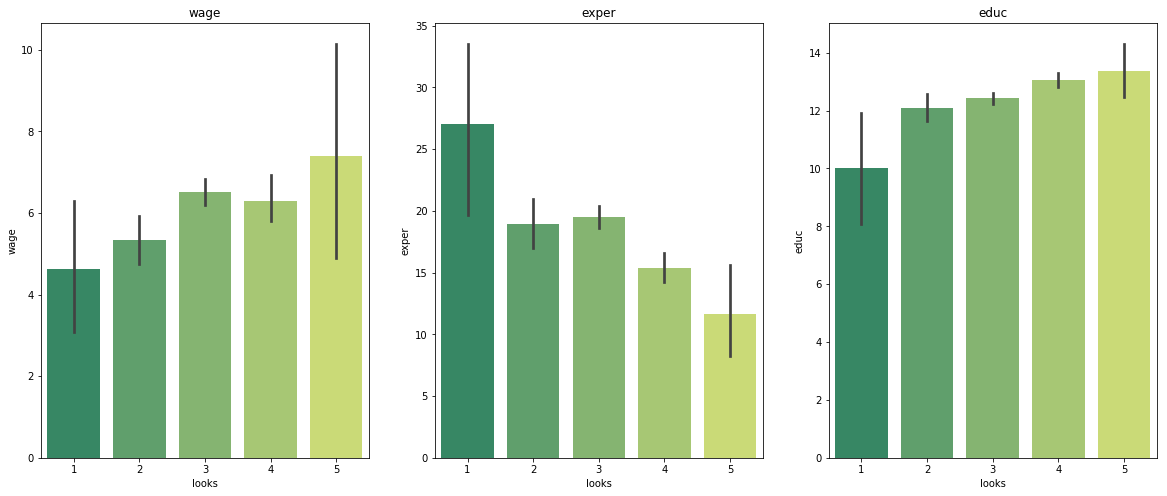

In [8]:
#wage	exper	educ	looks
#sex	race	status	health
#plt.scatter(df['educ'], df['looks'], alpha=0.5)
#plt.show()
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='looks',y='wage',data=df, \
           palette='summer')
plt.title('wage')
plt.subplot(1, 3, 2)
sns.barplot(x='looks',y='exper',data=df,\
           palette='summer')
plt.title('exper')
plt.subplot(1, 3, 3)
sns.barplot(x='looks',y='educ',data=df,\
           palette='summer')
plt.title('educ')
plt.show()

# Машинное обучение

1. Закодируйте все категориальные признаки с помощью OneHotEncoding.

2. Разбейте данные на train и test.

3. Обучите несколько алгоритмов классификации на полученных данных и выведите на экран качество (accuracy) каждого алгоритма на train и test.

In [9]:
#wage	exper	educ	looks
#sex	race	status	health
base = pd.get_dummies(df,columns=['sex','race','status','health'],dtype = int)
base.sample()
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 14 columns):
wage              1260 non-null float64
exper             1260 non-null int64
union             1260 non-null object
service           1260 non-null object
educ              1260 non-null int64
looks             1260 non-null int64
sex_female        1260 non-null int32
sex_male          1260 non-null int32
race_black        1260 non-null int32
race_white        1260 non-null int32
status_married    1260 non-null int32
status_single     1260 non-null int32
health_bad        1260 non-null int32
health_good       1260 non-null int32
dtypes: float64(1), int32(8), int64(3), object(2)
memory usage: 98.5+ KB


In [10]:
#np.info()
#X = base[base.columns['wage', 'exper']] 
#X = base[base.columns[1:4]]
#X = pd.concat([base[base.columns[0:1]], base[base.columns[4:]]], sort=True)
X = base[['wage', 'exper', 'educ','sex_female', 'sex_male','race_black', 'race_white','status_married', 'status_single', \
          'health_bad', 'health_good',]]
y = base[['looks']]

In [11]:
X.head(100)

,wage,exper,educ,sex_female,sex_male,race_black,race_white,status_married,status_single,health_bad,health_good
0,5.73,30,14,1,0,0,1,1,0,0,1
1,4.28,28,12,1,0,0,1,1,0,0,1
2,7.96,35,10,1,0,0,1,0,1,0,1
3,11.57,38,16,0,1,0,1,1,0,0,1
4,11.42,27,16,0,1,0,1,1,0,0,1
5,3.91,20,12,1,0,0,1,1,0,1,0
6,8.76,12,16,0,1,0,1,1,0,0,1
7,7.69,5,16,0,1,0,1,0,1,0,1
8,5.00,5,16,1,0,0,1,0,1,0,1
9,3.89,12,12,1,0,0,1,0,1,0,1


In [12]:
#your code here
y.head()

,looks
0,4
1,3
2,4
3,3
4,3


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.15)

model = LogisticRegression()
model.fit(train_x,train_y)

target_train = model.predict(train_x)
target_test = model.predict(test_x)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train,train_y),accuracy_score(target_test,test_y)))

score on train: 0.5723622782446312, score on test: 0.5767195767195767


C:\Users\IbnSina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\IbnSina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\IbnSina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


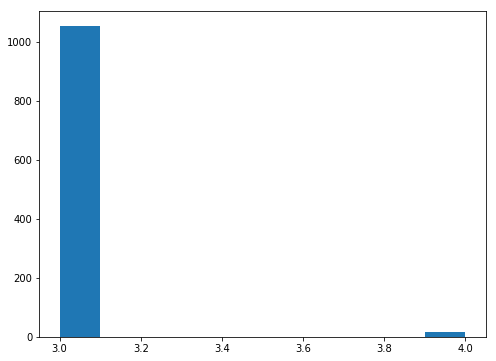

In [62]:
plt.figure(figsize=(8,6))
plt.hist(target_train)
plt.show()


### Алгоритмы, которые вы можете попробовать

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression() #LinearSVC() и т.д.

C:\Users\IbnSina\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score on train: 0.5714285714285714, score on test: 0.6190476190476191


C:\Users\IbnSina\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


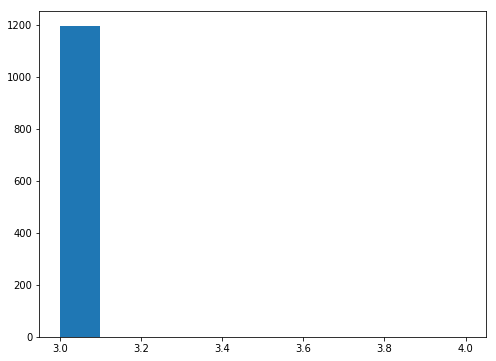

In [74]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.05)

model = LinearSVC()
model.fit(train_x,train_y)

target_train = model.predict(train_x)
target_test = model.predict(test_x)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train,train_y),accuracy_score(target_test,test_y)))

plt.figure(figsize=(8,6))
plt.hist(target_train)
plt.show()


In [70]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

score on train: 0.9916457811194653, score on test: 0.4444444444444444


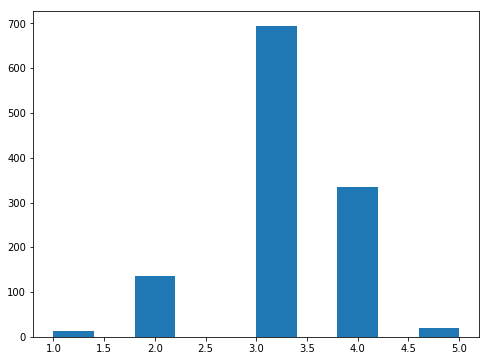

In [69]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.05)

model = DecisionTreeClassifier()
model.fit(train_x,train_y)

target_train = model.predict(train_x)
target_test = model.predict(test_x)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train,train_y),accuracy_score(target_test,test_y)))

plt.figure(figsize=(8,6))
plt.hist(target_train)
plt.show()


score on train: 0.9724310776942355, score on test: 0.42857142857142855


C:\Users\IbnSina\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\IbnSina\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


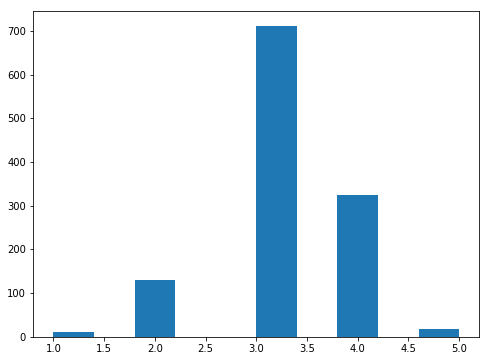

In [70]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size = 0.05)

model = RandomForestClassifier()
model.fit(train_x,train_y)

target_train = model.predict(train_x)
target_test = model.predict(test_x)

print('score on train: {0}, score on test: {1}'.format(accuracy_score(target_train,train_y),accuracy_score(target_test,test_y))) 

plt.figure(figsize=(8,6))
plt.hist(target_train)
plt.show()


# Сделайте выводы

1. Какой или какие факторы больше всего влияют на красоту человека?
2. Какой алгоритм сработал лучше всего?
3. Какой алгоритм больше всего переобучился? (качество на test гораздо ниже, чем качество на train, при этом качество на train достаточно высокое; качество сильно меняется при различных разбиениях на train и test).

1. Из категоральных признаков для мужчин важным фактором является здоровье. 
Из численных выжным является exper (возраст?), доход и уровнень образования негативно влияют если слишком маленькие значения. 
2. LinearSVC, но результаты схожи с LogisticRegression
3. DecisionTreeClassifier и RandomForestClassifier переобучаются 

Примечательно, что LinearSVC и  LogisticRegression по факту в большинстве случаев предсказывают значение 3, которое соответствуем максимальному количеству человек